#**Auxiliar 2 - Programas recursivos y notación Big-O**
##Profesores: Patricio Poblete, Nelson Baloian
###Auxiliares: Gabriel Flores, Gabriel Norambuena, Rodrigo Llull, Lucas Oyarzún


#P1. Recursión
En  esta  pregunta  recordaremos  lo  que  es  la  recursión,  contenido  que  se  vio  en  el  curso  de Introducción a la Programación.  Definiremos un  árbol de búsqueda binaria de números en base a nodos.  Para ello, necesitamos la clase *Nodo*, que contenga su número en un atributo llamado **info**, y una referencia a los hijos izquierdo y derecho, en atributos llamados **izq** y **der**, respectivamente.

In [ ]:
class Nodo:
  def __init__(self, info, izq=None, der=None):
    self.info = info
    self.izq = izq
    self.der = der

Una vez definida Nodo, procedemos de la siguiente forma:
* Creamos el nodo con valor 1, sin hijos.
* Continuamos con el 3, sin hijos.
* Creamos el 2, con hijos el 1 y el 3.
* Seguimos con el 6, sin hijos.
* Ahora con el 5, con hijo derecho el 6 e hijo izquierdo None.
* Terminamos creando el 4, con hijos el 2 y el 5. Este nodo sera llamado raíz.

In [ ]:
nodo1 = Nodo(1)
nodo3 = Nodo(3)
nodo2 = Nodo(2, nodo1, nodo3)
nodo6 = Nodo(6)
nodo5 = Nodo(5, der=nodo6)
raiz = Nodo(4, nodo2, nodo5)

Utilice la librería *AED-Utilities* para dibujar el árbol, y verificar que tiene la forma deseada. Para ello:

1.   Cree una instancia de una clase Arbol (que tiene solo la raiz como variable miembro), entregándole como argumento el nodo con valor 4 de la sección anterior.
2.   Cree una instancia de la clase BinaryTreeDrawer, con los argumentos fieldData=“info”,fieldLeft=“izq” y fieldRight=“der”.
3.   Dibuje el árbol utilizando el BinaryTreeDrawer creado.

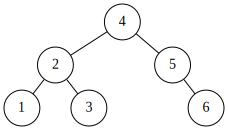

In [ ]:
!pip install aed-utilities
import aed_utilities as aed
class Arbol:
  def __init__(self, raiz):
    self.raiz = raiz
arbol = Arbol(raiz)
BTdraw = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight = "der")
BTdraw.draw_tree(arbol, "raiz")

Finalmente, se le pide definir una función que recorra los nodos recursivamente, imprimiendo sus  valores  en  orden  ascendente.   Por  ahora  no  necesita  trabajar  con  el  arbol  creado  para dibujar.

In [ ]:
def imprimirArbol(nodo):
  if nodo == None:
    return
  imprimirArbol(nodo.izq)
  print(nodo.info)
  imprimirArbol(nodo.der)

In [ ]:
imprimirArbol(raiz)

1
2
3
4
5
6


### P2) Motivación de cómo programar la solución

En la función `maximo`se observa el patrón típico para explorar elementos que cumplan una condición de "máximo" o "mejor":
- Iniciamos un estado con el peor caso posible (`este_maximo = float('-inf')` o `este_maximo = float('-inf')`). Éste será el valor a superar.
- Recorremos nuestra entrada (`for x in lista`)
- Comparamos nuestro estado con cada elemento recorrido. Si alguien le gana a nuestro estado, nos quedamos con el nuevo estado.

In [1]:
def maximo(lista):
    '''
    Retorna el máximo elemento de una lista.
    '''
    este_maximo = float('-inf') # si la lista puede tener negativos
    for x in lista:
        if x > este_maximo:
            este_maximo = x
    return este_maximo

Si nos solicitan más información asociada al valor, iniciamos tantas variables como requeramos (`indice_maximo = None`). Esta vez, cuando el elemento probado le gane a nuestro estado (`if x > este_maximo`) actualizamos todas las variables asociadas.

In [2]:
def maximo_indice(lista):
    '''
    Retorna el máximo elemento de una lista, y el índice de su posición dentro de la lista.
    '''
    este_maximo = float('-inf')
    indice_maximo = None
    for indice, x in enumerate(lista):
        if x > este_maximo:
            este_maximo = x
            indice_maximo = indice
    return este_maximo, indice

### Algoritmo $O(n^2)$ (todos los subarreglos posibles)

In [3]:
def segmentoMaximoQ(arreglo):
    max_sum = 0
    max_i, max_j = 0, -1
    for i in range(len(arreglo)):
        subsuma = 0
        for j in range(i, len(arreglo)):
            subsuma += arreglo[j]
            #print(f'i: {i}, j: {j}, arreglo: {arreglo[i:j]}, suma: {subsuma}')
            if subsuma > max_sum: # si este subarreglo es el maximo
                max_sum = subsuma
                max_i, max_j = i, j
    return max_sum, max_i, max_j

### Algoritmo $O(n \log(n))$ (*dividir para reinar*)

Este algoritmo divide recursivamente el problema en subproblemas: calcula el subarreglo de suma máxima de la mitad izquierda y de la mitad derecha por separado. Pero como también puede haber un mejor subarreglo que cruce desde la mitad izquierda a la mitad derecha, hay que revisar este caso cada vez. Esto lo realiza la función `maximoCruzado`.

In [4]:
def maximoCruzado(arreglo, inicio, mitad, fin):
    # mitad derecha
    max_sum_der = 0
    cum_sum_der = 0
    max_j = mitad
    # Iteramos desde la mitad hacia la derecha
    for j in range(mitad+1, fin): 
        cum_sum_der += arreglo[j]
        if cum_sum_der  > max_sum_der:
            max_sum_der = cum_sum_der
            max_j = j
    # mitad izquierda
    max_sum_izq = 0
    cum_sum_izq = 0
    max_i = mitad
    # Iteramos desde la mitad hacia la izquierda
    for i in range(mitad, inicio-1, -1):
        cum_sum_izq += arreglo[i]
        if cum_sum_izq > max_sum_izq:
            max_sum_izq = cum_sum_izq 
            max_i = i
    # suma (de ambas mitades), izq, der
    return max_sum_izq+max_sum_der, max_i, max_j

Función principal. Divide el arreglo en dos mitades, obtiene la solución para cada mitad, y revisa si es que existe una solución que esté solapada entre las dos mitades (llamando a `maximoCruzado`).

In [5]:
def segmentoMaximoD(arreglo, inicio, fin):
    # Caso base: el arreglo tiene sólo un elemento
    if fin - inicio == 1:
        # Si el elemento es positivo, dicho elemento es su suma máxima.
        # Pero si es negativo, nos conviene más no considerarlo y retornar una lista vacía (que suma 0).
        if arreglo[0] > 0:
            return arreglo[0], 0, 0
        return 0, 0, -1
    # Caso recursivo. Dividimos el arreglo por la mitad.
    mitad = inicio + int((fin-inicio)/2)
    suma_izq, i_izq, j_izq = segmentoMaximoD(arreglo, inicio, mitad)        # Mitad izquierda
    suma_der, i_der, j_der = segmentoMaximoD(arreglo, mitad, fin)            # Mitad derecha
    suma_cruz, i_cruz, j_cruz = maximoCruzado(arreglo, inicio, mitad, fin)   # Subarreglo cruzado (toca la mitad)
    # Comparamos los resultados, y entregamos el mejor de cada caso.
    if suma_izq >= max(suma_der, suma_cruz):
        return suma_izq, i_izq, j_izq
    if suma_cruz >= max(suma_izq, suma_der):
        return suma_cruz, i_cruz, j_cruz
    return suma_der, i_der, j_der

### Algoritmo $O(n)$ (Kadane)

In [8]:
def segmentoMaximoK(arreglo, inicio, fin):
    # Iniciamos los estados. La idea genial de este algoritmo es considerar 2 estados distintos:
    # - La suma máxima hasta ahora, y
    # - La suma de los últimos elementos de la lista (el sufijo)
    max_sum = 0
    i_max, j_max = 0, -1
    
    suma_sufijo = 0
    i_sufijo = 0
    for j in range(fin):
        # En este caso, suma_sufijo + arreglo[0] ya dio negativo. Si nos quedamos con este sufijo, y luego
        # viene un número positivo (digamos, 10), nos conviene más descartar el sufijo negativo, y partir
        # contando recién desde el 10
        if suma_sufijo + arreglo[j] < 0:
            suma_sufijo = 0
            i_sufijo = j+1
            continue
        # En este caso, suma_sufijo + arreglo[0] >= 0 (es decir, este sufijo nos sigue sirviendo.
        # Puede ser que no le gane al maximo que tenemos, pero siendo positivo, el siguiente elemento
        # podría ser un número alto (digamos, 100), así que "todo suma" para intentar ganarle al `max_sum`)
        suma_sufijo += arreglo[j]
        if suma_sufijo > max_sum:
            max_sum = suma_sufijo
            i_max, j_max = i_sufijo, j
    return max_sum, i_max, j_max

### Función solicitada

In [6]:
arr1 = [-1, -4, 5, -1, -4, 1, -6, -3]
arr2 = [-2, 1, -3, 4, -1, 2, 1, -5, 4]
arr3 = [-5, -6, -7, -8, -9, -10]

def segmentoMaximo(arreglo, algoritmo='n'):
    if algoritmo == 'n2':
        suma, i, j = segmentoMaximoQ(arreglo)
    elif algoritmo == 'nlogn':
        suma, i, j = segmentoMaximoD(arreglo, 0, len(arreglo))
    elif algoritmo == 'n':
        suma, i, j = segmentoMaximoK(arreglo, 0, len(arreglo))
    else:
        raise Exception('Algoritmo debe ser "n2", "nlogn" o "n"')
    j+=1 #  <- (***) Ojo aquí (ver más abajo)
    print(f'Suma: {suma} | i: {i} | j: {j} | arreglo: {arreglo[i:j]}')

In [9]:
segmentoMaximo(arr1, 'n2')
segmentoMaximo(arr1, 'nlogn')
segmentoMaximo(arr1, 'n')

Suma: 5 | i: 2 | j: 3 | arreglo: [5]
Suma: 5 | i: 2 | j: 3 | arreglo: [5]
Suma: 5 | i: 2 | j: 3 | arreglo: [5]


In [11]:
segmentoMaximo(arr2, 'n2')
segmentoMaximo(arr2, 'nlogn')
segmentoMaximo(arr2, 'n')

Suma: 6 | i: 3 | j: 7 | arreglo: [4, -1, 2, 1]
Suma: 6 | i: 3 | j: 7 | arreglo: [4, -1, 2, 1]
Suma: 6 | i: 3 | j: 7 | arreglo: [4, -1, 2, 1]


In [12]:
segmentoMaximo(arr3, 'n2')
segmentoMaximo(arr3, 'nlogn')
segmentoMaximo(arr3, 'n')

Suma: 0 | i: 0 | j: 0 | arreglo: []
Suma: 0 | i: 0 | j: 0 | arreglo: []
Suma: 0 | i: 0 | j: 0 | arreglo: []


In [13]:
arreglo_largo = arr1*100 + arr2 + arr1*100
print(f'Largo del arreglo largo: {len(arreglo_largo)}')

print('\nAlgoritmo n^2')
%time segmentoMaximo(arreglo_largo, 'n2')

print('\nAlgoritmo nlogn')
%time segmentoMaximo(arreglo_largo, 'nlogn')

print('\nAlgoritmo n')
%time segmentoMaximo(arreglo_largo, 'n')

Largo del arreglo largo: 1609

Algoritmo n^2
Suma: 6 | i: 803 | j: 807 | arreglo: [4, -1, 2, 1]
CPU times: user 146 ms, sys: 0 ns, total: 146 ms
Wall time: 150 ms

Algoritmo nlogn
Suma: 6 | i: 803 | j: 807 | arreglo: [4, -1, 2, 1]
CPU times: user 5.61 ms, sys: 0 ns, total: 5.61 ms
Wall time: 5.45 ms

Algoritmo n
Suma: 6 | i: 803 | j: 807 | arreglo: [4, -1, 2, 1]
CPU times: user 324 µs, sys: 0 ns, total: 324 µs
Wall time: 328 µs


En mi computador, el tiempo que tomó cada algoritmo (*Wall time*) fue:

| Algoritmo  | Tiempo   |
|------------|----------|
| $n^2$      | 105 ms   |
| $n\log(n)$ | 2,84 ms  |
| $n$        | 175 $\mu$s = 0,175 ms |

In [14]:
print(f'Largo del arreglo más largo: {len(arreglo_largo)*10}')
print('\nAlgoritmo n^2 [va a tardar un par de segundos]')
%time segmentoMaximo(arreglo_largo*10, 'n2')

print('\nAlgoritmo nlogn')
%time segmentoMaximo(arreglo_largo*10, 'nlogn')

print('\nAlgoritmo n')
%time segmentoMaximo(arreglo_largo*10, 'n')

Largo del arreglo más largo: 16090

Algoritmo n^2 [va a tardar un par de segundos]
Suma: 6 | i: 803 | j: 807 | arreglo: [4, -1, 2, 1]
CPU times: user 14.1 s, sys: 11.2 ms, total: 14.1 s
Wall time: 14.2 s

Algoritmo nlogn
Suma: 6 | i: 803 | j: 807 | arreglo: [4, -1, 2, 1]
CPU times: user 57 ms, sys: 0 ns, total: 57 ms
Wall time: 56.7 ms

Algoritmo n
Suma: 6 | i: 803 | j: 807 | arreglo: [4, -1, 2, 1]
CPU times: user 2.96 ms, sys: 0 ns, total: 2.96 ms
Wall time: 2.96 ms


### (***) Comentario sobre el `j+=1`

Se pueden extraer los subarreglos (*slices*) de listas de Python con la notación `arreglo[inicio:fin]`.
Pero comparémoslo con extraer un elemento de una lista `arreglo[posicion]`:

In [15]:
arreglo_prueba = [10,20,30,40,50]
print(arreglo_prueba[4])
print(arreglo_prueba[1:4])

50
[20, 30, 40]


En Python, la notación `arreglo[inicio:fin]` excluye al elemento en la posición `fin`.
Sin embargo, observemos cómo están programadas las funciones `segmentoMaximo{Q,D,K}`:
```python
max_sum = 0
max_i, max_j = 0, -1
for i in range(len(arreglo)):
    subsuma = 0
    for j in range(i, len(arreglo)):
        subsuma += arreglo[j]    # considerando el elemento j
        if subsuma > max_sum:    # este subarreglo es el maximo
            max_sum = subsuma
            max_i, max_j = i, j  # actalizamos estos subindices
```
Las funciones retornan los índices `i` y `j` considerando todos los elementos del subarreglo, incluyendo `j`. Así que si queremos obtener el resultado con `arreglo[i:j]`, tenemos dos opciones:
1. Actualizar haciendo `max_i, max_j = i, j+1` o Retornar `max_sum, max_i, max_j+1` (dentro de la función).
2. Incrementar `j` después de retornado (fuera de la función).

Esto es una decisión de implementación. Puede haber argumentos a favor de 1. y de 2., pero siempre va a haber alguien molesto.